In [1]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('data/daily-bike-share.csv')
bike_data.tail()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439


### Clean the data

In [3]:
# Check for missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

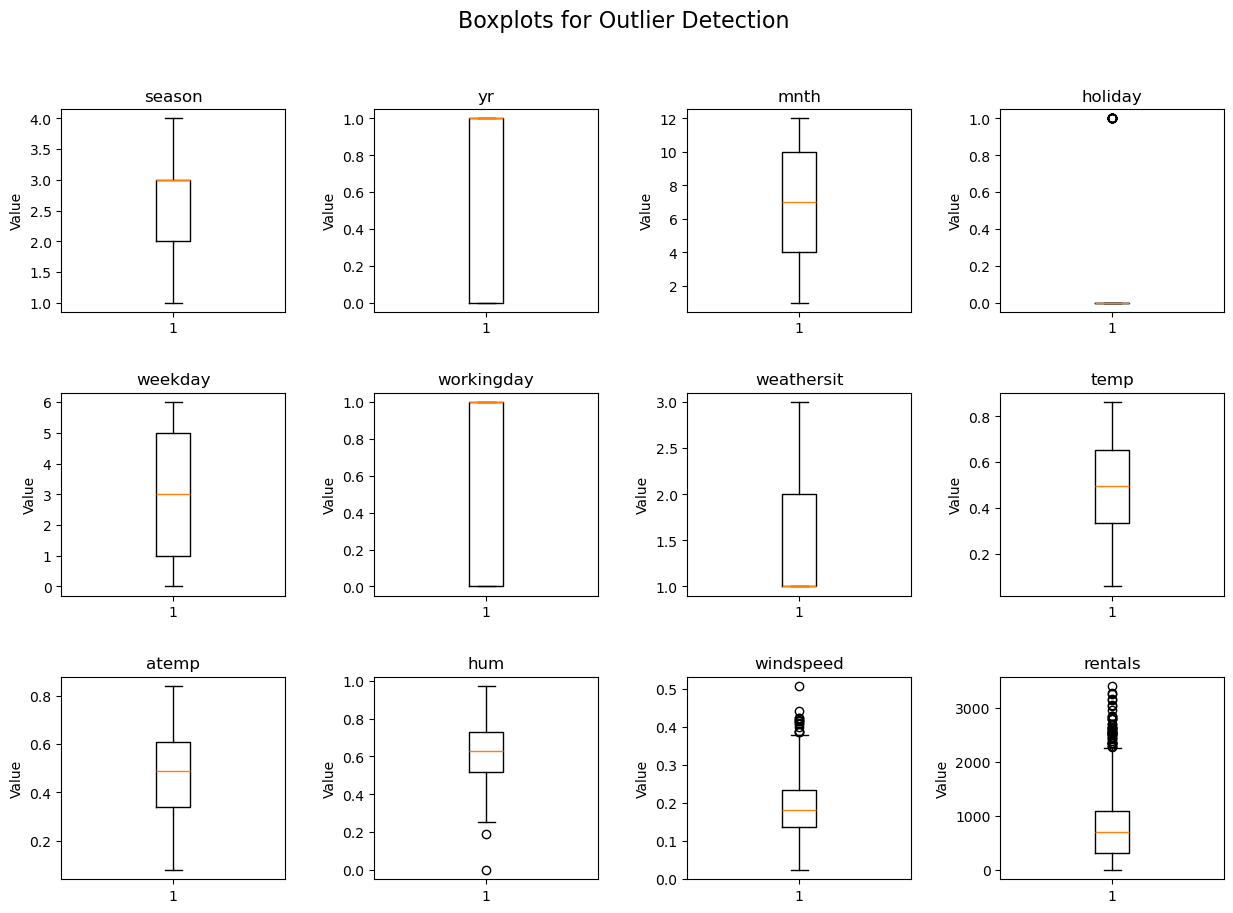

In [4]:
#Outlier detection

import matplotlib.pyplot as plt

# Define the function to show boxplots for each variable
def show_boxplots(data, columns):
    fig, ax = plt.subplots(3, 4, figsize=(15, 10))  # Adjusted to 3x4 grid to fit all columns
    fig.suptitle('Boxplots for Outlier Detection', fontsize=16)

    # Loop through each column and its position in the subplot grid
    for i, column in enumerate(columns):
        row, col = divmod(i, 4)  # divmod(i, 4) is a Python function that divides i by 4 and returns two values:
        #The quotient (how many complete groups of 4 there are) – this gives us the row position.
        #The remainder (the leftover part after dividing) – this gives us the column position.
        #Using divmod(i, 4) makes the process of positioning each boxplot in the grid easier because it automatically calculates the row and column for each subplot based on the index i. Instead of manually specifying the row and column for each plot, divmod handles the math for you.
        ax[row, col].boxplot(data[column])
        ax[row, col].set_title(column)
        ax[row, col].set_ylabel('Value')

    # Control spacing
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # Show figure
    plt.show()

# List of columns to plot
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals']

# Call the function with the dataset and the selected columns
show_boxplots(bike_data, columns)


In [5]:
# Function to calculate and flag outliers and data within whiskers
def calcIQR(var_data, column_name):
    # Calculate Q1 and Q3
    Q1 = var_data.quantile(0.25)
    Q3 = var_data.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate lower and upper whiskers
    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR

    # Flag outliers
    bike_data[f'{column_name}_outlier'] = (var_data < lw) | (var_data > uw)

    # Flag data within whiskers (not an outlier)
    bike_data[f'{column_name}_within_whiskers'] = (var_data >= lw) & (var_data <= uw)

# Call the function for each column of interest
calcIQR(bike_data['hum'], 'hum')
calcIQR(bike_data['windspeed'], 'windspeed')
calcIQR(bike_data['rentals'], 'rentals')

In [6]:
# Outliers subset: includes any row where an outlier is present in 'hum', 'windspeed', or 'rentals'
outliers_data = bike_data[(bike_data['hum_outlier']) | (bike_data['windspeed_outlier']) | (bike_data['rentals_outlier'])]

# Within whiskers subset: includes any row where data is within whiskers for all columns
within_whiskers_data = bike_data[(bike_data['hum_within_whiskers']) & 
                                 (bike_data['windspeed_within_whiskers']) & 
                                 (bike_data['rentals_within_whiskers'])]


In [7]:
# Extract the 'rentals', 'hum' and 'windspeed' column from the within_whiskers_data subset
rentals_within_whiskers = within_whiskers_data['rentals']
hum_within_whiskers = within_whiskers_data['hum']
windspeed_within_whiskers = within_whiskers_data['windspeed']




# Univariate Analysis (Single Variable)

### Summary Statistics: 

In [10]:
def summarystat_by_year(data, column_name):
    # Group the data by year
    grouped_data = data.groupby('yr')[column_name]

    # Create a dictionary to store the summary statistics
    stats_dict = {
        'Mean': grouped_data.mean(),
        'Standard Deviation': grouped_data.std(),
        'Median': grouped_data.median(),
        # Mode needs a different approach as it can return multiple values
    #The .values attribute in var_data.mode().values is used to extract the mode values as a NumPy array. only the first mode (if multiple exist) is captured.
        'Mode': grouped_data.apply(lambda x: x.mode().values[0] if not x.mode().empty else None),
        'Minimum': grouped_data.min(),
        'Maximum': grouped_data.max(),
    }

       # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_dict)

      # tabular view 
    print(f"Summary statistics for {column_name} by year:")
    print(stats_df)
    print("\n" + "*"*50 + "\n")  # For readability between different columns

# Call the function for each column of interest
summarystat_by_year(bike_data, 'temp')
summarystat_by_year(bike_data, 'atemp')
summarystat_by_year(bike_data, 'hum')
summarystat_by_year(bike_data, 'windspeed')
summarystat_by_year(bike_data, 'rentals')
summarystat_by_year(within_whiskers_data, 'rentals')
summarystat_by_year(within_whiskers_data, 'hum')
summarystat_by_year(within_whiskers_data, 'windspeed')


Summary statistics for temp by year:
        Mean  Standard Deviation    Median      Mode  Minimum   Maximum
yr                                                                     
0   0.486665            0.189596  0.479167  0.635000  0.05913  0.849167
1   0.504081            0.176112  0.514167  0.265833  0.10750  0.861667

**************************************************

Summary statistics for atemp by year:
        Mean  Standard Deviation    Median      Mode   Minimum   Maximum
yr                                                                      
0   0.466835            0.168836  0.472846  0.318812  0.079070  0.840896
1   0.481852            0.156756  0.497779  0.375621  0.101658  0.804913

**************************************************

Summary statistics for hum by year:
        Mean  Standard Deviation    Median      Mode   Minimum  Maximum
yr                                                                     
0   0.643665            0.148744  0.647500  0.542500  0.000

### Temperature
- **Mean:** The average temperature is slightly higher in year 1 ~ 2012 (0.504) compared to year 0 ~ 2011 (0.487), suggesting a possible trend or seasonal effect across years.
- **Standard Deviation:** Year 0 has a higher variability in temperature (0.190) than year 1 (0.176), indicating more consistent temperatures in year 1.

### Apparent Temperature (atemp)
- **Mean:** Apparent temperatures are slightly higher in year 1 (0.482) than year 0 (0.467), which aligns with the observed trend in temp.

### Humidity
- **Mean:** Humidity averages are slightly higher in year 0 (0.644) than in year 1 (0.612), possibly suggesting more humid conditions in the earlier year.

### Windspeed 
- **Mean:** Windspeed averages are close across both years (0.191 in year 0 and 0.190 in year 1), suggesting consistent wind conditions.

### Rentals 
- **Mean:** Rentals increased significantly from year 0 (677.4) to year 1 (1018.5), which may reflect increased demand, weather conditions, or other trends.

## *These summary statistics suggest overall higher bike rental activity in the second year, possibly due to slightly warmer and less humid conditions, which may have been more appealing for cycling.*

### Histogram Distribution

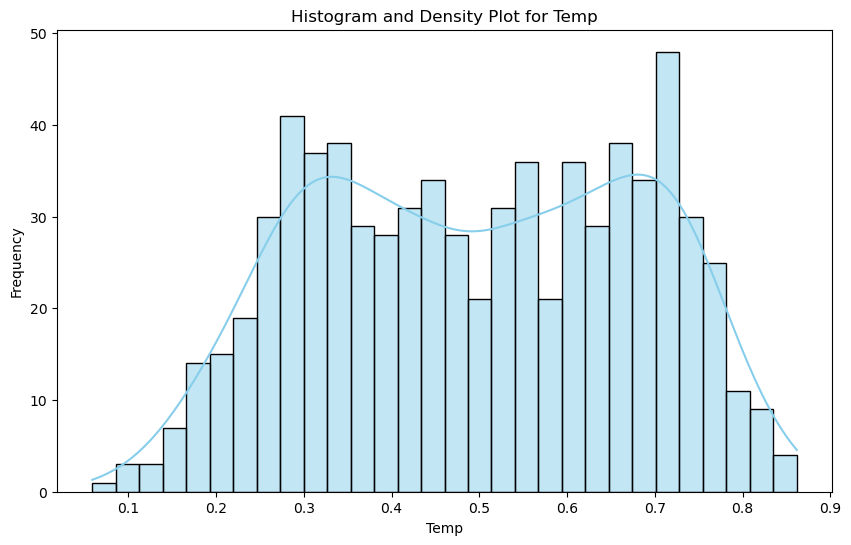

Kurtosis of Data: 1.8805774511526943
Skewness of Data: -0.05440902480571621


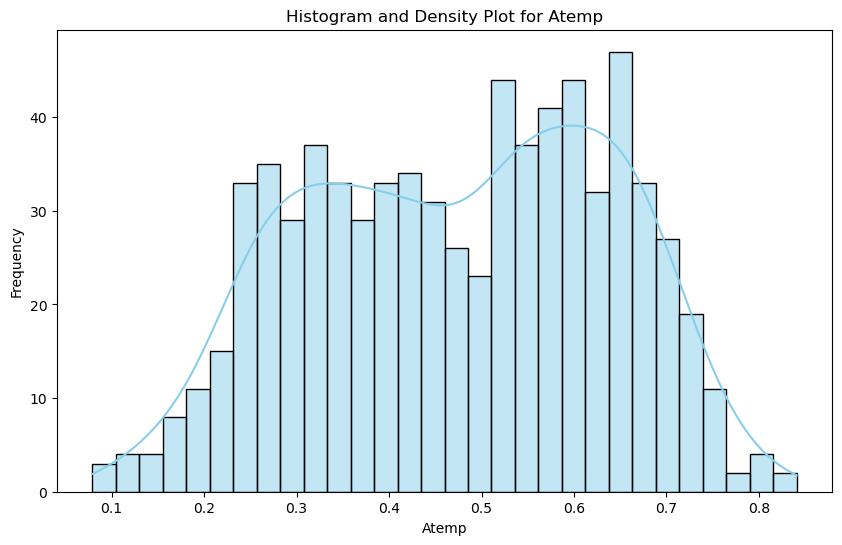

Kurtosis of Data: 2.0133980947056864
Skewness of Data: -0.13081889807374117


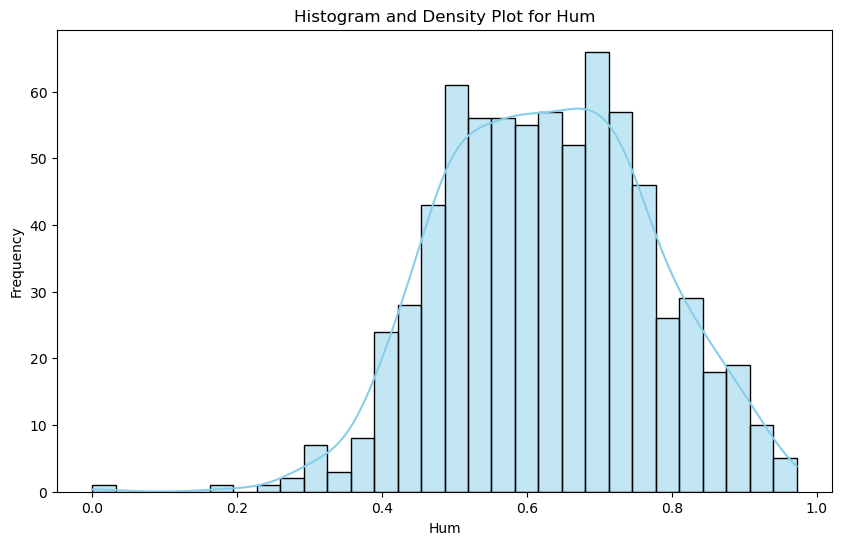

Kurtosis of Data: 2.92771368208013
Skewness of Data: -0.0696401578315237


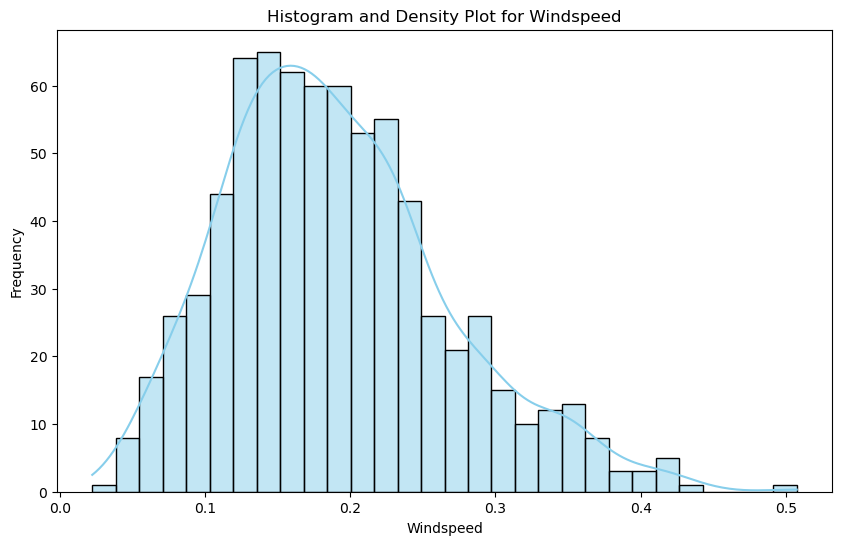

Kurtosis of Data: 3.399920238326856
Skewness of Data: 0.6759547264275364


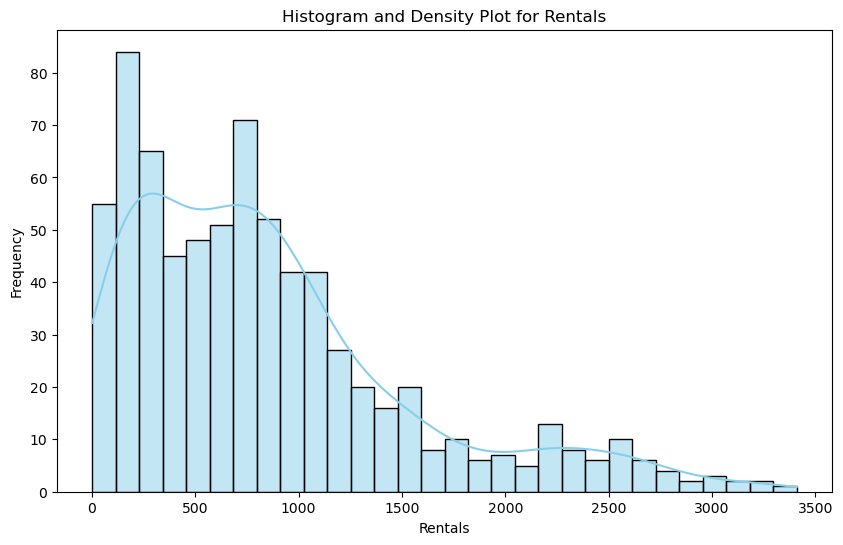

Kurtosis of Data: 4.3048519916891435
Skewness of Data: 1.2638538063682596


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

# Function to plot histogram with density curve
def plot_histogram_with_density(data, column_name, bins=30):
    # bins: Integer, number of bins for the histogram (default is 30).
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    sns.histplot(data[column_name], bins=bins, kde=True, color='skyblue', edgecolor='black')
    
    # Add labels and title
    plt.xlabel(f'{column_name.capitalize()}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram and Density Plot for {column_name.capitalize()}')
    
    # Display plot
    plt.show()

    #calculate kurtosis and skewness. fisher=False function uses the "Pearson definition" of kurtosis, where the kurtosis of a normal distribution is 3. Kurtosis >3 is Leptokurtic i.e sharp peak while Kurtosis < 3 is Platykurtic i.e lighter tails than normal and Kurtosis = 3 Mesokurtic similar to a normal distribution.
    kurt_var_data = kurtosis(data[column_name], fisher=False)
    skew_var_data = skew(data[column_name])

    print(f"Kurtosis of Data: {kurt_var_data}")
    print(f"Skewness of Data: {skew_var_data}")

# usage for each continuous variable
columns = ['temp', 'atemp', 'hum', 'windspeed', 'rentals']
for column in columns:
    plot_histogram_with_density(bike_data, column)
    


### Evaluate Normality using Shapiro-Wilk test
- A **large p-value** indicates the data is **normally distributed**, while a **low p-value** indicates it **isn't**.

In [20]:
from scipy.stats import shapiro

# Continuous variables
columns = ['temp', 'atemp', 'hum', 'windspeed', 'rentals']

for col in columns:
    # Perform the Shapiro-Wilk test
    stat, p = shapiro(bike_data[col])
    
    # Display the results
    print(f"Column: {col}")
    print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    
    # Interpretation
    if p > 0.05:
        print("The data appears to be normally distributed.")
    else:
        print("The data does not appear to be normally distributed.")
    print()


Column: temp
Shapiro-Wilk Test Statistic: 0.9659
P-value: 0.0000
The data does not appear to be normally distributed.

Column: atemp
Shapiro-Wilk Test Statistic: 0.9738
P-value: 0.0000
The data does not appear to be normally distributed.

Column: hum
Shapiro-Wilk Test Statistic: 0.9933
P-value: 0.0025
The data does not appear to be normally distributed.

Column: windspeed
Shapiro-Wilk Test Statistic: 0.9712
P-value: 0.0000
The data does not appear to be normally distributed.

Column: rentals
Shapiro-Wilk Test Statistic: 0.8850
P-value: 0.0000
The data does not appear to be normally distributed.



### Frequency Counts for Categorical Variables

In [22]:
import pandas as pd

# Define a function to calculate frequency counts for a categorical column, separated by year
def calculate_frequency_counts(data, column_name):
  
    # Group data by year and the categorical variable, then count occurrences
    frequency_counts = data.groupby(['yr', column_name]).size().unstack()
    
    # Display the frequency table
    print(f"Frequency Counts for '{column_name}' by Year:\n")
    print(frequency_counts)
    print("\n" + "="*50 + "\n")
    
    return frequency_counts

# List of categorical columns to analyze
categorical_columns = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Apply the function to each categorical column
for column in categorical_columns:
    calculate_frequency_counts(bike_data, column)


Frequency Counts for 'season' by Year:

season   1   2   3   4
yr                    
0       90  92  94  89
1       91  92  94  89


Frequency Counts for 'yr' by Year:

yr      0      1
yr              
0   365.0    NaN
1     NaN  366.0


Frequency Counts for 'holiday' by Year:

holiday    0   1
yr              
0        355  10
1        355  11


Frequency Counts for 'weekday' by Year:

weekday   0   1   2   3   4   5   6
yr                                 
0        52  52  52  52  52  52  53
1        53  53  52  52  52  52  52


Frequency Counts for 'workingday' by Year:

workingday    0    1
yr                  
0           115  250
1           116  250


Frequency Counts for 'weathersit' by Year:

weathersit    1    2   3
yr                      
0           226  124  15
1           237  123   6




### Season by Year
Each year (0 and 1) has roughly similar counts across the seasons:
- Season 3 (fall) has the highest frequency, with 94 occurrences each year.
- Season 4 (winter) is the least common in both years with 89 occurrences.

### Yearly Counts (yr)
- Year 0 has 365 entries, while Year 1 has 366.
- The difference is due to Year 1 likely being a leap year with an extra day (February 29).

### Holiday by Year
- Non-holidays (0) are far more frequent, with 355 days each year not marked as holidays.
- Holidays (1) occur 10 times in Year 0 and 11 times in Year 1, suggesting that holidays are rare, occurring around 10 times per year on average.

### Weekday by Year
Each day of the week has roughly equal counts, reflecting an even distribution of entries across weekdays:
- For Year 0, most days appear 52 times, except Saturday (6) with 53 counts.
- For Year 1, Sunday and Monday have slightly higher counts (53 each), while other days have 52.


### Working Day by Year
- Working days (1) occur 250 times each year, while non-working days (0) occur 115 times in Year 0 and 116 times in Year 1.
- This suggests that the dataset categorizes approximately 250 days per year as working days

### Weather Situation by Year (weathersit)
- Weather situation **1 (clear)** is the most frequent in both years, with 226 occurrences in Year 0 and 237 in Year 1.
- Weather situation **3 (light rain/snow)** is the rarest, with 15 instances in Year 0 and only 6 in Year 1.
- This frequency also shows that extreme weather **4 (heavy rain/hail/snow/fog)** is nonexistent in both years.

# Bivariate Analysis 

### Correlation Analysis:

#### Spearman Correlation  
**Justification**:  
Data seems to be non-normal and has outliers.


Spearman Correlation Matrix:
               temp     atemp       hum  windspeed   rentals
temp       1.000000  0.992554  0.129903  -0.147153  0.667427
atemp      0.992554  1.000000  0.139648  -0.168987  0.667679
hum        0.129903  0.139648  1.000000  -0.239006 -0.070781
windspeed -0.147153 -0.168987 -0.239006   1.000000 -0.180319
rentals    0.667427  0.667679 -0.070781  -0.180319  1.000000


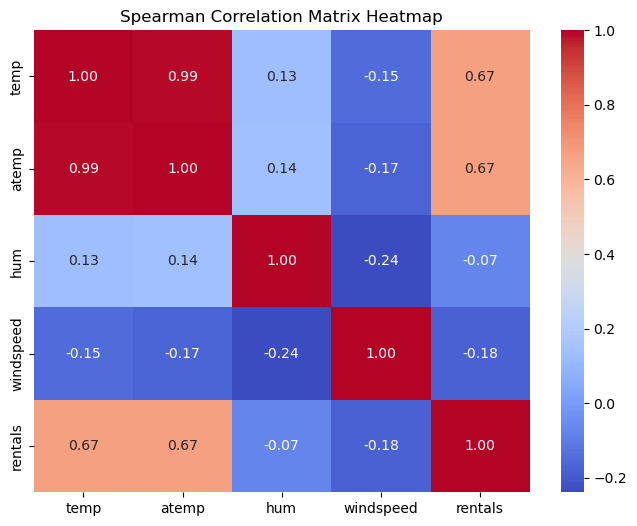

In [31]:
# use pandas to calculate the correlation matrix and seaborn to visualize it with a heatmap for better interpretation.
# List of continuous variables for correlation analysis
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'rentals']

# Calculate Spearman correlation
spearman_corr = bike_data[continuous_vars].corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(spearman_corr)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Spearman Correlation Matrix Heatmap")
plt.show()


### General Insights:
- Temperature **(temp and atemp)** is the most influential factor for rentals. Warmer weather leads to more rentals, highlighting its importance for bike-sharing programs.
- **Humidity and windspeed** have less impact on rentals, but their negative correlations suggest they could still deter cycling under extreme conditions.
- The very strong correlation between temp and atemp could mean they are **redundant** in some analyses **(e.g., multicollinearity in regression)**.

### Scatter Plot to visualize the relationships

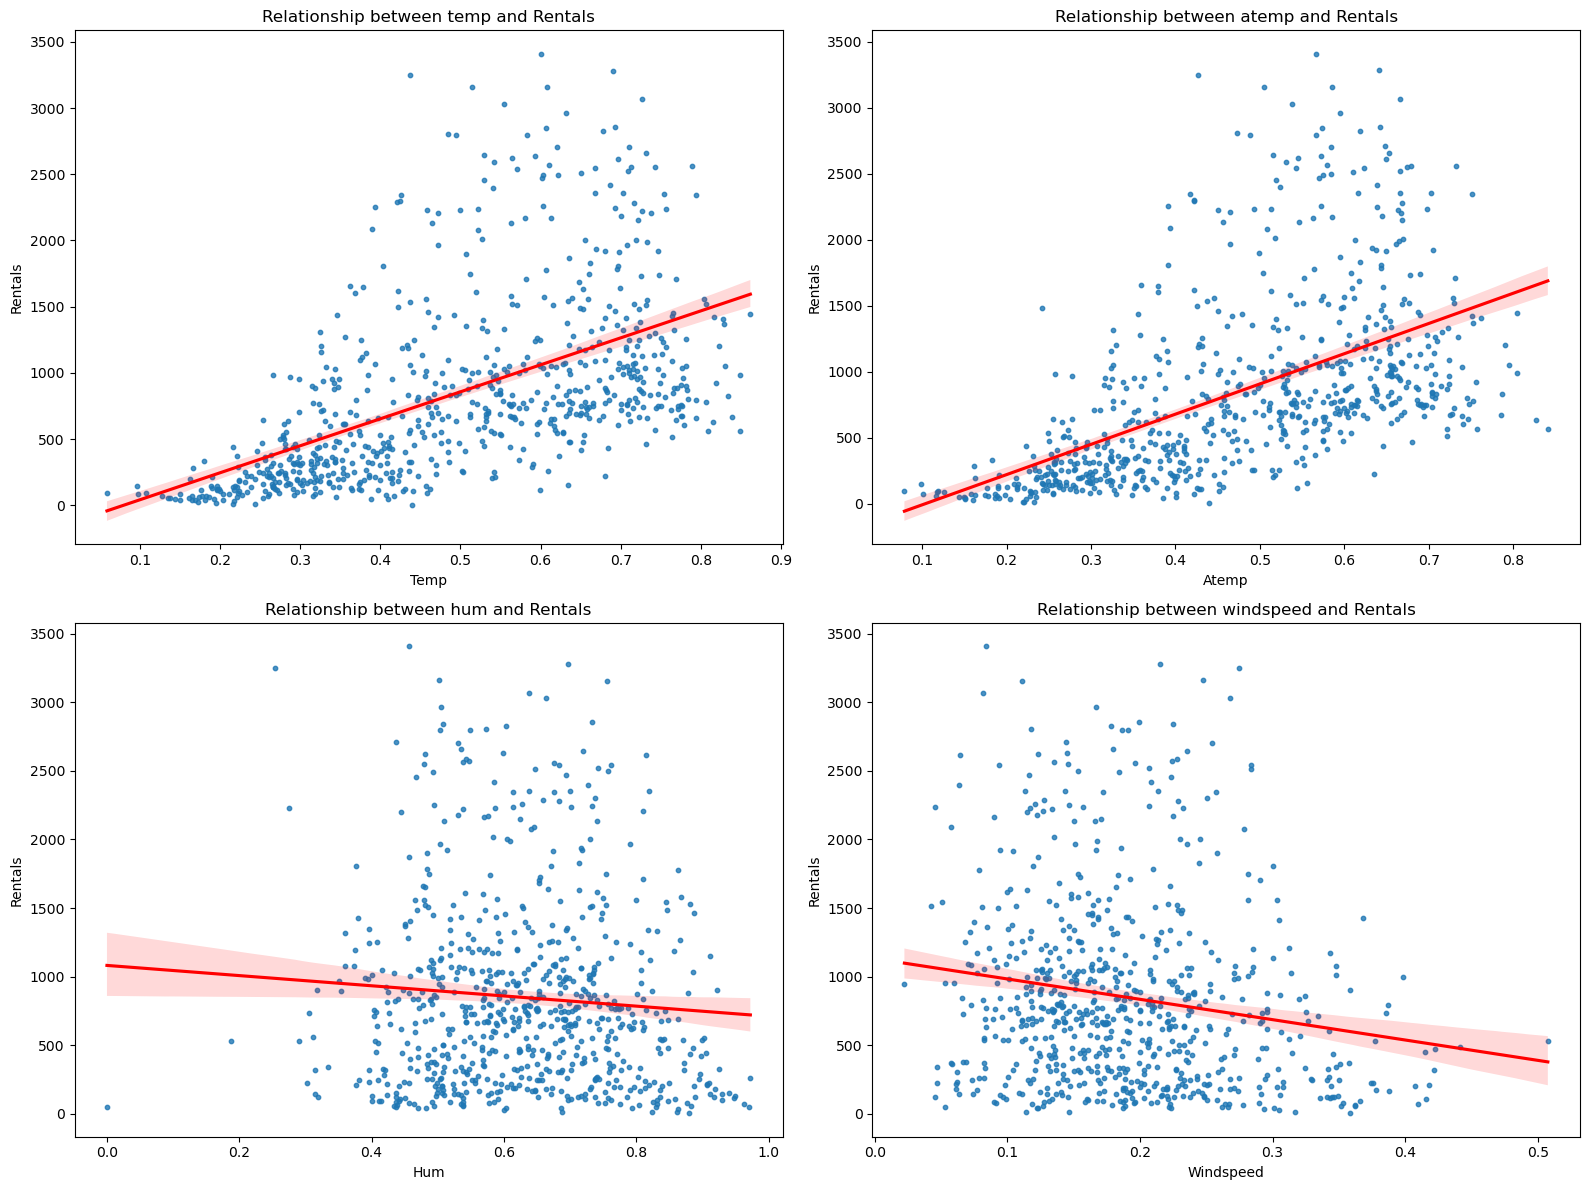

In [34]:

# List of continuous variables to analyze against rentals
variables = ['temp', 'atemp', 'hum', 'windspeed']

# Create scatterplots
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, start=1): #when using plt.subplot(), the enumerate() function by default starts counting from 0, but plt.subplot() expects the index to be 1-based (starting from 1).
    plt.subplot(2, 2, i)
    #sns.scatterplot(x=bike_data[var], y=bike_data['rentals'])
    sns.regplot(x=bike_data[var], y=bike_data['rentals'], scatter_kws={'s': 10} ,line_kws={'color': 'red'})
    #sns.regplot(): This function plots a scatterplot and fits a regression line.
    #scatter_kws={'s': 10}: This reduces the size of the scatter points to make the plot less cluttered.
    #line_kws={'color': 'red'}: This makes the regression line red for better visibility.
    plt.title(f'Relationship between {var} and Rentals')
    plt.xlabel(var.capitalize())
    plt.ylabel('Rentals')

plt.tight_layout() #automatically adjusts the positioning of subplots and elements of the plot (like titles, axis labels, and tick labels) to make sure they fit within the figure area without overlapping.
plt.show()


### Relationship between rentals (a continuous variable) and categorical variables (e.g., season, holiday, weekday, workingday, and weathersit) 

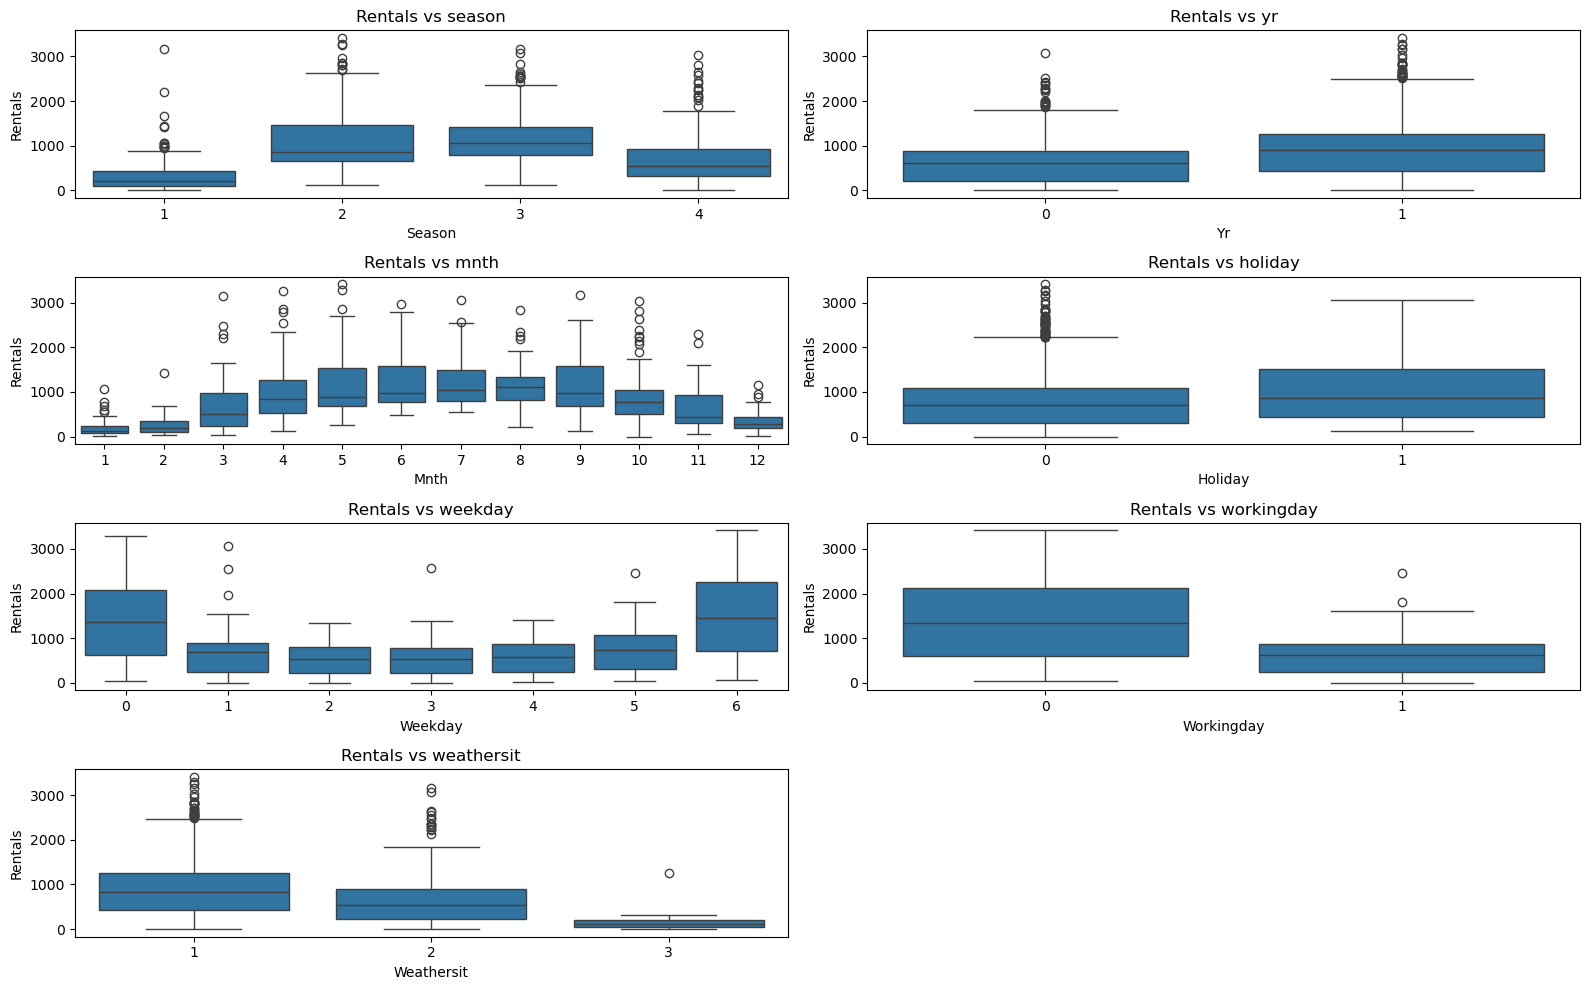

In [36]:

categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(16, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=bike_data, x=var, y='rentals')
    plt.title(f'Rentals vs {var}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Rentals')

plt.tight_layout()
plt.show()


In [37]:
from scipy.stats import kruskal

# List of categorical variables to test
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Perform Kruskal-Wallis test
#bike_data[var] == group: Filters the dataset for rows where the categorical variable equals a specific group (e.g., season = "summer").
#['rentals']: Selects the rentals column for that group.
#bike_data[var].unique(): Lists all unique categories in the current variable.
#*groups: The asterisk unpacks the list so that each group is treated as a separate input. e.g. kruskal(group1, group2, group3, group4)
for var in categorical_vars:
    groups = [bike_data[bike_data[var] == group]['rentals'] for group in bike_data[var].unique()]
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis Test for {var}:")
    print(f"  Test Statistic: {stat:.2f}, P-Value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Significant difference between groups.\n")
    else:
        print("  No significant difference between groups.\n")


Kruskal-Wallis Test for season:
  Test Statistic: 278.83, P-Value: 0.0000
  Significant difference between groups.

Kruskal-Wallis Test for yr:
  Test Statistic: 47.49, P-Value: 0.0000
  Significant difference between groups.

Kruskal-Wallis Test for mnth:
  Test Statistic: 344.53, P-Value: 0.0000
  Significant difference between groups.

Kruskal-Wallis Test for holiday:
  Test Statistic: 1.22, P-Value: 0.2688
  No significant difference between groups.

Kruskal-Wallis Test for weekday:
  Test Statistic: 134.11, P-Value: 0.0000
  Significant difference between groups.

Kruskal-Wallis Test for workingday:
  Test Statistic: 125.59, P-Value: 0.0000
  Significant difference between groups.

Kruskal-Wallis Test for weathersit:
  Test Statistic: 71.43, P-Value: 0.0000
  Significant difference between groups.



### line plots over time

#### Ensure that the dteday column is in datetime format for accurate time-series plotting:

In [40]:
bike_data['dteday'].head()

0    1/1/2011
1    1/2/2011
2    1/3/2011
3    1/4/2011
4    1/5/2011
Name: dteday, dtype: object

In [41]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data['dteday'].head()


0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]

#### Filter the Data by Year

In [43]:
bike_data_2011 = bike_data[bike_data['yr'] == 0]
bike_data_2012 = bike_data[bike_data['yr'] == 1]


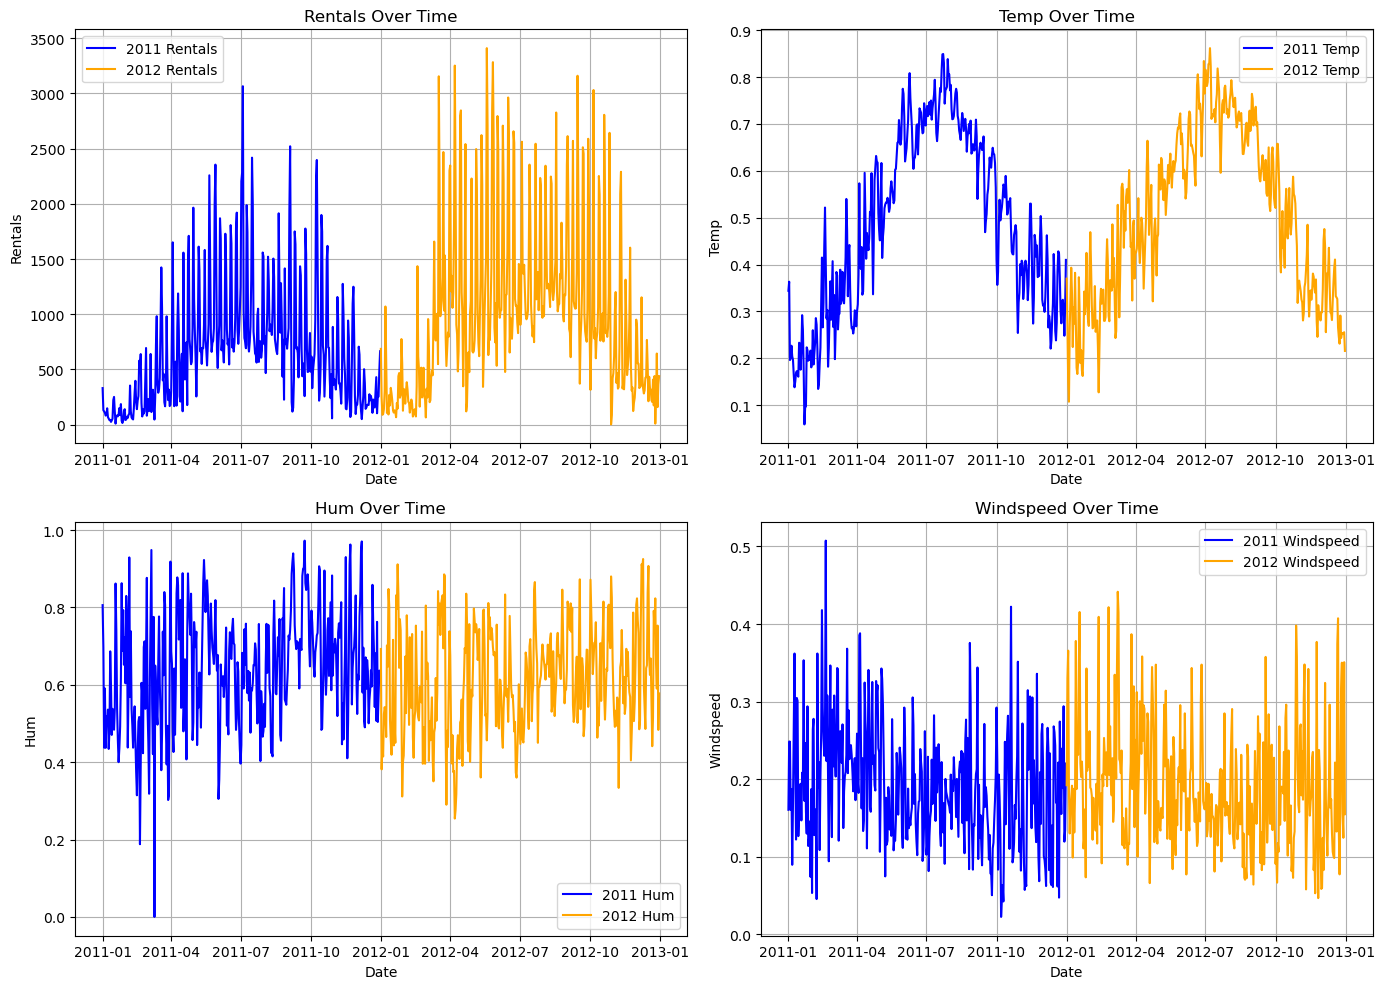

In [44]:
# Variables to plot
variables = ['rentals', 'temp', 'hum', 'windspeed']

# Create a figure
plt.figure(figsize=(14, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)  # Create subplots in a 2x2 grid
    
    # Plot for 2011 (blue color)
    plt.plot(bike_data_2011['dteday'], bike_data_2011[var], label=f'2011 {var.capitalize()}', color='blue')
    
    # Plot for 2012 (orange color)
    plt.plot(bike_data_2012['dteday'], bike_data_2012[var], label=f'2012 {var.capitalize()}', color='orange')
    
    # Add titles and labels
    plt.title(f'{var.capitalize()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(var.capitalize())
    
    # Add a legend
    plt.legend()
    
    # Add a grid
    plt.grid(True)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


 ### Multivariate Analysis 

- In this dataset, rentals represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

#### Perform some feature engineering to combine or derive new features.

In [48]:
# let's add a new column named day to the dataframe by extracting the day component from the existing dteday column.
#The new column represents the day of the month from 1 to 31.
#A DatetimeIndex allows convenient access to datetime properties like the year, month, day, etc.
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,rentals,hum_outlier,hum_within_whiskers,windspeed_outlier,windspeed_within_whiskers,rentals_outlier,rentals_within_whiskers,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,False,True,False,True,False,True,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,False,True,False,True,False,True,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,False,True,False,True,False,True,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,False,True,False,True,False,True,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,False,True,False,True,False,True,5


## Train a Regression Model

- Train a regression model that uses the features we've identified as potentially predictive to predict the rentals label.

- The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict.

#### Key Characteristics of **.values**:
- Converts the pandas Series into a NumPy array, which is a more basic data structure optimized If you need to perform vectorized operations, mathematical calculations, or feed the data into a machine learning model that requires a NumPy array..
- NumPy arrays are faster and use less memory for numerical computations compared to pandas objects.
- Drops the associated index from the Series.
- Libraries like scikit-learn, often require NumPy arrays as input.
- A more modern and recommended approach is using .to_numpy() instead of .values, as .values may behave differently for some data types (e.g., categorical data).



In [53]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')
#X[:10]: The first 10 rows of the feature array.
#y[:10]: The first 10 labels.

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

- After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.

- We could train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets; a **(typically larger)** set with which to **train** the model, and a **smaller "hold-back"** set with which to **validate** the trained model. 

- It's important to split the data **randomly** (rather than say, taking the first 70% of the data for training and keeping the rest for validation). 

- To randomly split the data, we'll use the **train_test_split** function in the **scikit-learn** library.
The train_test_split function splits the data into training and test sets **randomly**. This randomness means you may get a different split every time you run the code.

#### **test_size=0.30:** Specifies that 30% of the data should be allocated to the test set, leaving 70% for the training set.
#### **random_state=0:**  It makes sure the randomness is the same every time you run the code. The split will always happen in the same way every time you run the code. Does the Number Matter? No, as long as you fix it to some number (e.g., 0, 42, etc.).

In [59]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

#What Does .shape[0] Do? The [0] here is slicing the first value of the .shape tuple, which is the number of rows.
#X_train = [[1, 2],[3, 4],[5, 6]] X_train.shape    # Output: (3, 2) X_train.shape[0] # Output: 3
#So: X_train.shape[0] gives the number of rows (data points). X_train.shape[1] gives the number of columns (features).


Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train:** The feature values we'll use to train the model
- **y_train:** The corresponding labels we'll use to train the model
- **X_test:** The feature values we'll use to validate the model
- **y_test:** The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a **suitable regression algorithm** to the training data. We'll use a **linear regression algorithm**, a common starting point for regression that works by **trying to find a linear relationship between the X values and the y label**. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In Scikit-Learn, training algorithms are encapsulated in **estimators**, and in this case we'll use the **LinearRegression estimator** to train a linear regression model.

In [61]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set. .fit(X_train, y_train): Trains the model using the training data
#During training, the model learns the optimal weights (coefficients) and bias (intercept) to minimize the error between the predicted and actual values.
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


#### The **model variable** contains the **trained linear regression model.**

You can use this model to:
- **Make predictions:** Use .predict() to predict the target values for new data (e.g., X_test).
- **Inspect learned parameters:** Check the **model's coefficients and intercept** using:
    
**print("Coefficients:", model.coef_)**
**print("Intercept:", model.intercept_)**




In [63]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print()

#Mapping coefficients to feature names
feature_names = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
coef_df = pd.DataFrame(model.coef_, index=feature_names, columns=["Coefficient"])
print(coef_df)


Coefficients: [   71.75356438   -14.5970099   -315.70947115    11.35736594
  -838.15406232   -46.76224     2004.33895862   -32.69033323
  -553.31616475 -1229.49259224]
Intercept: 985.600759174832

            Coefficient
season        71.753564
mnth         -14.597010
holiday     -315.709471
weekday       11.357366
workingday  -838.154062
weathersit   -46.762240
temp        2004.338959
atemp        -32.690333
hum         -553.316165
windspeed  -1229.492592


### Evaluate the Trained Model
Now that we've trained the model, we can use it to **predict rental counts for the features we held back in our validation dataset**. Then we can **compare these predictions to the actual label values** to evaluate how well (or not!) the model is working.

In [65]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True) #This ensures that when printing large or small numbers, scientific notation (like 1.23e+03) is suppressed, and regular decimal notation is used instead.
print('Predicted labels: ', np.round(predictions)[:10])
#np.round(predictions): Rounds the predicted values to the nearest integer for easier comparison with actual labels and then Slices the array to display only the first 10 predicted values.
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparing each prediction with its corresponding "ground truth" actual value **isn't a very efficient way** to determine how well the model is predicting. Let's see if we can get a better indication by **visualizing a scatter plot that compares the predictions to the actual labels**. We'll also **overlay a trend line to get a general sense for how well the predicted labels align with the true labels.**

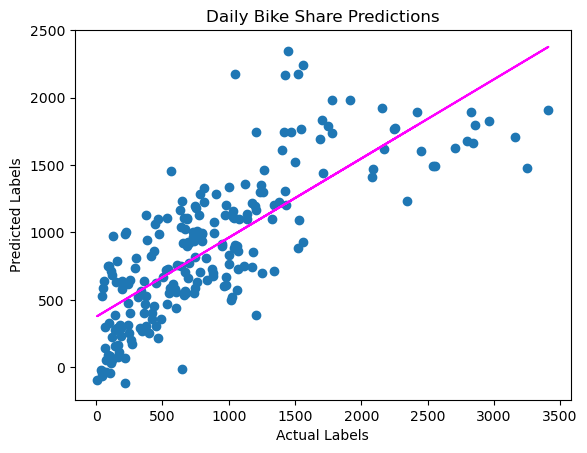

In [67]:

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**np.polyfit(y_test, predictions, 1):**

- Fits a **polynomial of degree 1 (a straight line)** to the relationship between y_test (actual labels) and predictions (predicted labels).
- This returns the coefficients of the line:
**z[0]: Slope of the line.**
**z[1]: Intercept of the line.**
  
**np.poly1d(z):**

- Creates a polynomial function 
p(x) based on the coefficients in z.
For a straight line, 
**p(x)=z[0]⋅x+z[1].**
  


There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the *residuals* of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of *error* when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>)**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.


Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186


### Root Mean Squared Error (RMSE): 449.41

- On average, the error between the actual and predicted rentals is about 449 bikes.
- An error of around 449 is quite large.
- This indicates that the model could benefit from improvement (e.g., adding more relevant features or trying a different algorithm).

### R² (R-squared): 0.604

- The model explains about 60.4% of the variation in bike rentals based on the features provided.
- The remaining 39.6% of the variation is unexplained, meaning the model might be missing some important predictors.
- An R² of 0.604 is moderate, it shows the model is capturing some trends, but there’s room for improvement. Adding features could help or trying different machine learning models (e.g. Random Forest or Gradient Boosting) might also improve performance.



### Example of Business Impact:
Imagine you're using this model to predict the number of bikes to allocate at a station each day:

- If the model predicts 1000 bikes for a day but actual demand is off by 449 (±449 bikes), this could result in over-allocation (empty bikes taking up space) or under-allocation (customers finding no bikes available).
- Improving the model can help optimize bike distribution, reduce operational costs, and improve customer satisfaction.

### Why the Model May Have Underperformed
**Non-Normal Data:**

- If your target variable (e.g., bike rentals) is skewed or has outliers, the Linear Regression model may not fit the data well. This is because extreme values disproportionately influence the model's coefficients, leading to inaccurate predictions.
  
**Nonlinear Relationships:**

- If bike rentals are influenced by nonlinear factors, Linear Regression won't capture these relationships effectively.
  
**High Variance in Residuals:**

- Non-normal data often leads to inconsistent residuals, violating the assumptions of constant variance (homoscedasticity). This can reduce model accuracy.

## Check Residuals:
- Plot the residuals (actual - predicted) to see if they are normally distributed.

<Axes: ylabel='Count'>

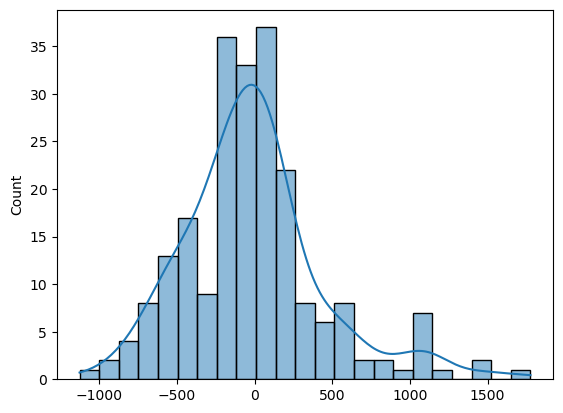

In [75]:
import seaborn as sns
sns.histplot(y_test - predictions, kde=True)


In [76]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the residuals
residuals = y_test - predictions
skewness = skew(residuals)
kurt = kurtosis(residuals)  

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: 0.9254399261566669
Kurtosis: 1.8614864141791196


- The skewness is positive and relatively close to 1. This means the residuals have a rightward skew. In other words, the model tends to under-predict on the lower end (more negative residuals) and over-predict on the higher end (more positive residuals). This is a mild positive skew, indicating that the model is slightly biased toward higher values.
- The kurtosis is lower than 3, which means the distribution of residuals is platykurtic, i.e., it is flatter than a normal distribution. In this case, the residuals have fewer outliers and the tails are not as heavy as a normal distribution. A value of 1.86 suggests the model might not be capturing some of the extreme variations in the data well, which could imply that the model is underfitting the data or is too simplistic.

# Experiment with Algorithms

The linear regression algorithm we used to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

- **Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an *Ordinary Least Squares* algorithm), but other variants such as *Lasso* and *Ridge*.
  1. Lasso and Ridge are linear regression algorithms that help address specific challenges encountered in ordinary linear regression, particularly when dealing with **Multicollinearity (correlation between features)** or when your model needs **regularization (preventing overfitting)**.
  2. Linear regression is a popular choice, but it often faces the **challenge of overfitting**, especially with a high number of parameters. **Regularization** techniques are used to address overfitting and enhance model generalizability.  
  3. Overfitting happens when your model learns the training data too well, including noise and irrelevant details. This makes the model perform well on the training data but poorly on new, unseen data because the noise and irrelevant details don't generalize to new data. By removing irrelevant features, you help the model generalize better.
  4. **Ridge regression** is useful when the goal is to minimize the impact of less important features while keeping all variables in the model.
  5. **Lasso regression** is preferred when the goal is feature selection, resulting in a simpler and more interpretable model with fewer variables.
  6. The **results** of **ridge regression** may be less interpretable due to the inclusion of all features, each with a reduced but non-zero coefficient.
  7. **Lasso regression** can improve interpretability by selecting only the most relevant features, making the model's predictions more explainable.
  8. **Ridge** is more robust and less sensitive to outliers unlike **Lasso** which is more sensitive to outliers.
  9. Use **Ridge** when you have many **correlated predictors and want to avoid multicollinearity**. Use **Lasso** when **feature selection is crucial or when you want a sparse model**.
  10. When using either:
                     - Look at the coefficients to see how they were adjusted.
                     - Check the model's performance metrics (e.g., RMSE, R^2) to see if it improved over ordinary linear regression.
                     - Examine how many features were eliminated for Lasso
  11. **Embedded Methods** select features during model training, making them efficient and accurate (*Lasso, Ridge, and Tree-Based Methods i.e. Decision Trees, Random Forests and Gradient Boosting which rank features based on their importance.*)
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction.
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

> **Note**: For a full list of Scikit-Learn estimators that encapsulate algorithms for supervised machine learning, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/supervised_learning.html). There are many algorithms to choose from, but for most real-world scenarios, the [Scikit-Learn estimator cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) can help you find a suitable starting point. 

### Try Another Linear Algorithm

Let's try training our regression model by using a **Lasso** algorithm. We can do this by just changing the estimator in the training code.

In **Lasso and Ridge regression**, the alpha parameter (also called the regularization parameter or penalty term) controls the strength of regularization applied to the model. If you fail to specify the alpha, the model uses its **default value ~ 1.0**, which impacts the amount of regularization and ultimately the model's performance. The default alpha=1.0 may not be the best choice for your specific dataset. It could lead to:
- Under-regularization (too little penalty), resulting in overfitting.
- Over-regularization (too much penalty), leading to underfitting.

### Hyperparameter Tuning: Grid Search

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Define range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV for Lasso Regression
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5) #5-fold cross-validation
lasso_grid.fit(X_train, y_train)
print(f"Best alpha for Lasso: {lasso_grid.best_params_}")

# GridSearchCV for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5) #5-fold cross-validation
ridge_grid.fit(X_train, y_train)
print(f"Best alpha for Ridge: {ridge_grid.best_params_}")


Best alpha for Lasso: {'alpha': 1}
Best alpha for Ridge: {'alpha': 0.1}


Lasso() 

Coefficients: [   70.68338757   -13.88572764  -275.11079951    11.59701697
  -826.21984332   -68.87065461  1938.69978058     0.
  -414.4345568  -1003.75920519]
Intercept: 891.5756227720724

            Coefficient
season        70.683388
mnth         -13.885728
holiday     -275.110800
weekday       11.597017
workingday  -826.219843
weathersit   -68.870655
temp        1938.699781
atemp          0.000000
hum         -414.434557
windspeed  -1003.759205
Predicted labels:  [1887. 1182.  967.  -31.  301.  386.  494.  600. 1445.  -16.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]
MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


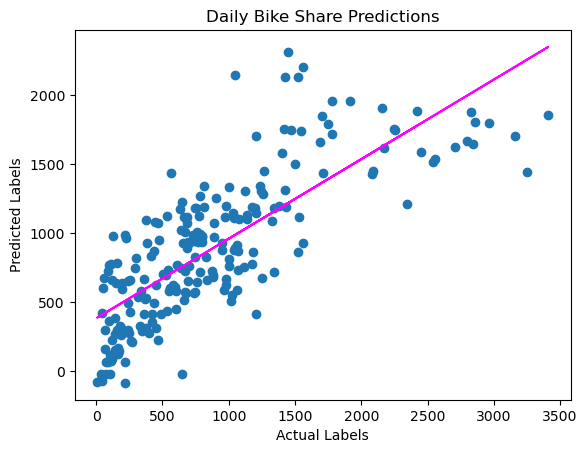

In [82]:
# Train the model

# Fit a Lasso model on the training set. .fit(X_train, y_train): Trains the model using the training data
#During training, the model learns the optimal weights (coefficients) and bias (intercept) to minimize the error between the predicted and actual values.
model = Lasso().fit(X_train, y_train)
print (model, "\n")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print()
feature_names = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
coef_df = pd.DataFrame(model.coef_, index=feature_names, columns=["Coefficient"])
print(coef_df)

predictions = model.predict(X_test)
np.set_printoptions(suppress=True) #This ensures that when printing large or small numbers, scientific notation (like 1.23e+03) is suppressed, and regular decimal notation is used instead.
print('Predicted labels: ', np.round(predictions)[:10])
#np.round(predictions): Rounds the predicted values to the nearest integer for easier comparison with actual labels and then Slices the array to display only the first 10 predicted values.
print('Actual labels   : ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

#Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Ridge

In [84]:

# Fit a Ridge model on the training set. .fit(X_train, y_train): Trains the model using the training data
#During training, the model learns the optimal weights (coefficients) and bias (intercept) to minimize the error between the predicted and actual values.
model = Ridge(alpha=0.1).fit(X_train, y_train)
print (model, "\n")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print()
feature_names = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
coef_df = pd.DataFrame(model.coef_, index=feature_names, columns=["Coefficient"])
print(coef_df)

predictions = model.predict(X_test)
np.set_printoptions(suppress=True) #This ensures that when printing large or small numbers, scientific notation (like 1.23e+03) is suppressed, and regular decimal notation is used instead.
print('Predicted labels: ', np.round(predictions)[:10])
#np.round(predictions): Rounds the predicted values to the nearest integer for easier comparison with actual labels and then Slices the array to display only the first 10 predicted values.
print('Actual labels   : ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)


Ridge(alpha=0.1) 

Coefficients: [   71.8594711    -14.58069822  -310.45162783    11.68343303
  -835.83338157   -50.70431202  1625.38421297   388.16643499
  -536.96900303 -1156.7913917 ]
Intercept: 952.1878853657231

            Coefficient
season        71.859471
mnth         -14.580698
holiday     -310.451628
weekday       11.683433
workingday  -835.833382
weathersit   -50.704312
temp        1625.384213
atemp        388.166435
hum         -536.969003
windspeed  -1156.791392
Predicted labels:  [1894. 1178. 1003.  -23.  314.  386.  479.  594. 1479.  -20.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]
MSE: 200512.10529790111
RMSE: 447.7857805892245
R2: 0.6069086024335929


### Comparing Coefficients
1. **OLS Linear Regression Coefficients:**
   
- Coefficients are high for certain features, such as temp (2004.34) and windspeed (-1229.49) which suggests a strong (possibly overstated) influence of these features on rentals.

2. **Lasso Coefficients:**
   
- Lasso is performing feature selection by effectively removing atemp from the model. This simplifies the model and makes it less prone to overfitting.

3. **Ridge Coefficients:**

- Coefficients are also reduced compared to OLS. For example, windspeed is less extreme (-1156.79 compared to -1229.49 in OLS), and temp is split between temp (1625.38) and atemp (388.17). This reflects Ridge's approach of shrinking coefficients to avoid overfitting.
  
4. **Comparing Intercepts**

- The intercept is smaller in Lasso (891.58) and Ridge (952.19) than in OLS (985.60). This reduction indicates regularization has helped adjust the baseline value to better generalize the model.

5. **Comparing Predictions: Predicted vs. Actual labels**

- All models show significant differences between predictions and actual labels for some test samples, indicating they struggle with certain scenarios (e.g., large errors for Actual: 2418 and Predicted: ~1887 in all models).

6. **Evaluating Metrics**

- Ridge regression achieves the lowest error (RMSE: 447.79), followed closely by Lasso (RMSE: 448.50), with OLS having the highest error (RMSE: 449.41). While the differences in RMSE between the models are consistent with the expectation that Ridge and Lasso help prevent overfitting through regularization, the differences are relatively small. This suggests that in this particular dataset, regularization provides only a marginal improvement in model performance compared to OLS.
- Ridge achieves the highest R² (0.6069), meaning it explains 60.69% of the variance in the target variable (rentals).

### Try a Decision Tree Algorithm

As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a *branch* in a *decision tree* based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

A decision tree is a tree where each node represents a feature, each branch represents a decision, and each leaf represents an outcome (numerical value regression).

Decision trees are often used for both **classification** and **regression**. 

### How does a decision tree work?
1. It looks at all the features.
2. It decides which feature splits the data best.
3. It keeps splitting the data until:
   - Each group is very pure (contains only similar outcomes), or
   - It can't split the data further.

### Why use decision trees?
- Easy to understand. Can present to non-technical stakeholders when explaining the model.
- Handles Nonlinear data.
- They show which features matter most (Feature importance).
- No need for data normalization.
- Work well with complex relationships.

### Limitations of decision trees.
- **Overfitting** If the tree becomes too complex (too many branches), it memorizes the training data and performs poorly on new data. **Solution** Prune(remove branches that split on features with low importance) or limit its depth.
- **Instability** small changes in the data can lead to a completely different tree.
- Does not work well with small datasets.
- Not as accurate as ensemble methods.

The model's fit can then be evaluated through the process of **cross-validation**. Another way that decision trees can maintain their accuracy is by forming an **ensemble** via a **random forest** algorithm; this classifier predicts more accurate results particularly when the individual trees are uncorrelated with each other.


It's easiest to see how this works with an example. Let's train a Decision Tree regression model using the bike rental data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 21)}
model = DecisionTreeRegressor(random_state=0)
#scoring based on R^2 or other metric
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best max_depth:", grid_search.best_params_['max_depth'])


Best max_depth: 3


Model trained successfully

            Importance
season        0.000000
mnth          0.000000
holiday       0.000000
weekday       0.000000
workingday    0.477668
weathersit    0.000000
temp          0.437172
atemp         0.040261
hum           0.044899
windspeed     0.000000
Predicted labels:  [2034.  882.  365.  196.  196.  417.  882.  882.  983.  196.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]

Evaluation Metrics:
MSE: 175436.13
RMSE: 418.85
R2: 0.66


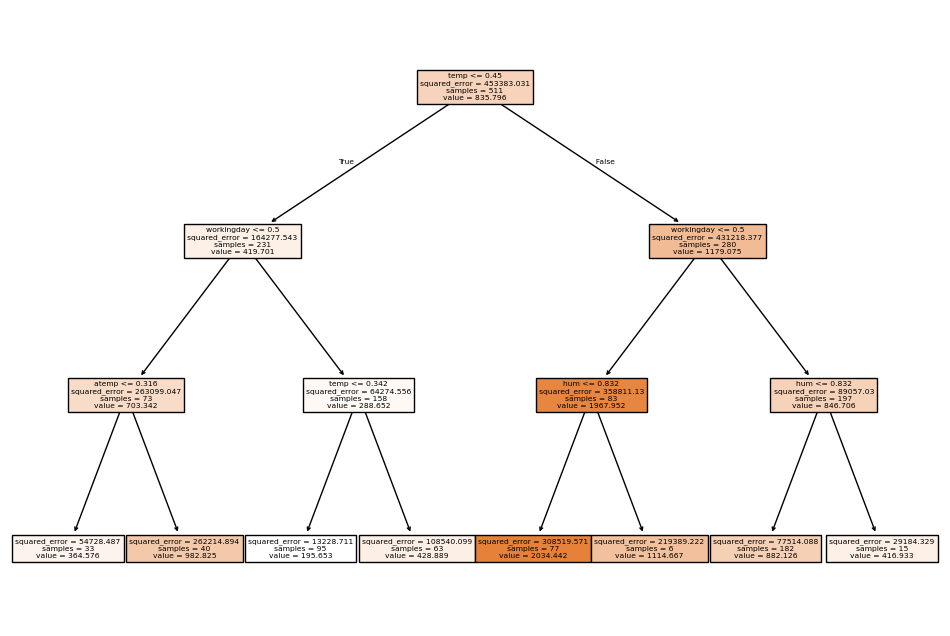

In [88]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the decision tree regressor
model = DecisionTreeRegressor(max_depth=3, random_state=0)

# Train the model on your training data
model.fit(X_train, y_train)
print("Model trained successfully\n")

# Feature importance instead of coefficients
feature_names = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
feature_importances = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["Importance"])
print(feature_importances)

# Predictions
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)  # Suppress scientific notation for printing
print('Predicted labels: ', np.round(predictions)[:10])  # Rounded predictions for better readability
print('Actual labels   : ', y_test[:10])

# Evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"\nEvaluation Metrics:\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR2: {r2:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, filled=True)
plt.show()


**workingday: 0.477668** - The most important feature, accounting for 47.77% of the total information gain. The model splits on this feature the most to reduce error or impurity.
**temp: 0.437172** - The second most important feature, contributing 43.72% of the total information gain. This feature also significantly affects the predictions.
**hum: 0.044899** - A minor contributor, with 4.49% importance, meaning it has some predictive value but not as much as the top two features.
**atemp: 0.040261** - Another minor contributor with 4.03% importance, indicating limited but meaningful influence on the model.
**Other features: 0.000000** - Features like season, mnth, holiday, weekday, weathersit, and windspeed are not used at all in the splits, meaning they do not contribute to improving the model's predictions in this case.

- Decision trees prioritize splits that reduce impurity the most. If a feature doesn't lead to a significant reduction in impurity (variance or squared error), it won't be used, resulting in zero importance.
- The results suggest that workingday and temp are the most critical factors influencing the target variable. This insight could be valuable for domain-specific interpretations or decision-making.
- For features with low or zero importance, consider transformations or interactions to see if they become more predictive.
- The feature importance values are specific to the current decision tree. In ensemble methods (e.g., Random Forest), importance values might differ as they average contributions over multiple trees.

## Key Elements in the Tree
The fact that workingday has higher importance than temp doesn't always guarantee that workingday will appear first in the decision tree splits. Tree's **splitting logic** is based on how well a feature performs at each individual node in terms of **splitting the data into more homogeneous groups**. At each node of the decision tree, the algorithm looks at all the features and evaluates which feature best splits the data into subsets that reduce the variance (squared error). This evaluation is done locally at each node, not globally across the entire tree.

**Nodes:** Each box represents a **decision node or a leaf node.**
Nodes contain the following information: 
- **Feature and Threshold (e.g., temp <= 0.45):** The decision rule.
- **Squared Error:** It represents how much variation exists in the target variable (e.g., bike rentals) for the samples at that node. A lower squared error indicates that the data points are more similar in terms of the target variable.
- **Samples:** Number of data points in that node. As you move down the tree, the number of samples decreases since data gets divided at each split.
- **Value:** Predicted value (average target value) for the node. 

**Splits:**
- Each split divides the data **based on whether the feature's value satisfies the threshold**.
- The tree proceeds **left if the condition is true and right if false.**

**Leaf Nodes:**
- These are **terminal nodes (no further splits).**
- The value in these nodes represents the **prediction for all data points in that group**.

## Interpretation
**Root Node**

**Condition: temp <= 0.45**

- This is the first and most important split.
- The data is divided into two groups:
- **Left Branch (True): temp is less than or equal to 0.45.**
- **Right Branch (False): temp is greater than 0.45.**
- Value: The predicted value is 835.796, which represents the average target value of all samples at the root.

**Left Branch (True for temp <= 0.45)**

**Condition: workingday <= 0.5**

- If workingday is less than or equal to 0.5, the data splits further.
- Predicted value here reduces to 419.701 after the split.

**Further Splits:**

**Left Sub-Branch (atemp <= 0.316):**
Predicted values range from 364.576 to 703.342, depending on the final leaf node.

**Right Sub-Branch (temp <= 0.342):**
Predicted values range from 195.653 to 288.652.

**Left Branch (True for workingday <= 0.5)**

**Condition: atemp <= 0.316**

- This splits based on workingday.
- Predicted value increases to 703.342 after the split.

**Left Branch (True for atemp <= 0.316)**

**For this exact combination of conditions, the tree outputs the single predicted value of 364.576 at the leaf node. When temp <= 0.45, workingday <= 0.5, and atemp <= 0.316, the predicted value is 364.576.**
